<a href="https://colab.research.google.com/github/marcus-v-rodrigues/ml-project/blob/main/Trabalho_Pr%C3%A1tico_1_%E2%80%93_Tarefas_Preditivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marcus Vinícius Santos Rodrigues - 11218862

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, recall_score, precision_score, f1_score

In [44]:
# Lendo os dados de espectros e metadados
spectra = pd.read_csv('pure_spectra_matrix.csv', header=None, sep=';')
metadata = pd.read_csv('pure_spectra_metadata.csv', sep=';')

In [45]:
# Juntando os dados de espectros com os metadados
data = pd.concat([metadata, spectra], axis=1)

## Pré-processamento

In [46]:
# Dividindo em características (X) e alvo (y)
X = data.iloc[:, 2:]  # As características são os espectros
y = data['Species']  # O alvo é a coluna 'Species'

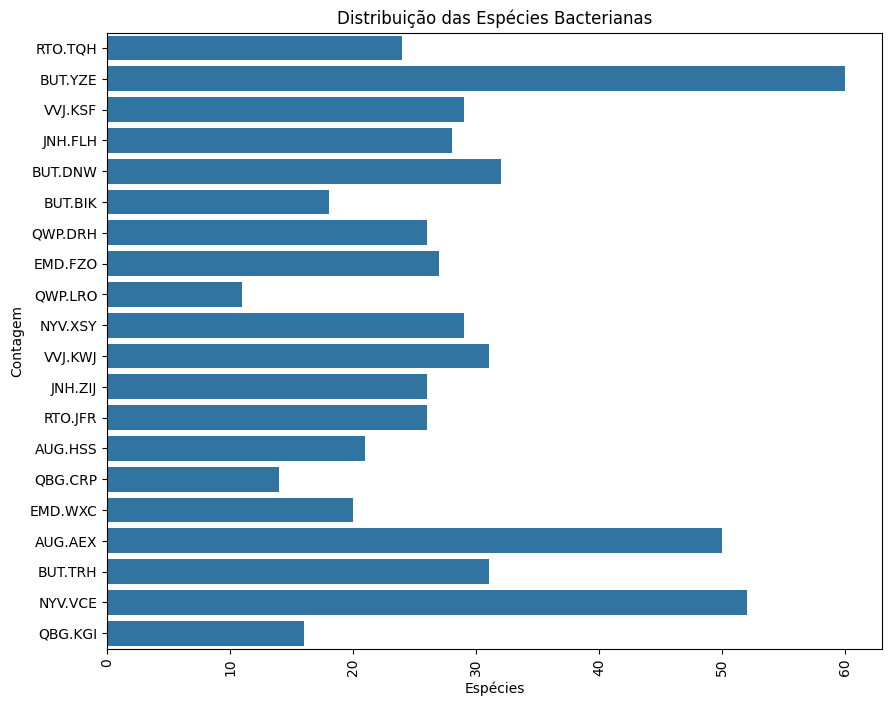

In [47]:
# Visualização da distribuição das classes
plt.figure(figsize=(10, 8))
sns.countplot(y=y)
plt.title('Distribuição das Espécies Bacterianas')
plt.xlabel('Espécies')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

## Pipeline

In [48]:
# Pipeline de preprocessamento e classificação
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Cross-validation

In [49]:
# Definição de cross-validation
cv = StratifiedKFold(n_splits=10)

In [58]:
# Variáveis para armazenar métricas e matrizes de confusão
classification_reports = []
conf_matrices = []

In [59]:
# Cross-validation manual
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinando o pipeline
    pipeline.fit(X_train, y_train)

    # Predições no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Gerando relatório de classificação
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    classification_reports.append(report)

    # Gerando matriz de confusão para o fold atual
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

In [60]:
# Agregando e calculando médias das métricas de cada classe ao longo dos folds
average_report = {}
classes = classification_reports[0].keys() - {'accuracy', 'macro avg', 'weighted avg'}

for label in classes:
    label_metrics = {}
    for metric in ['precision', 'recall', 'f1-score']:
        label_metrics[metric] = np.mean([rep[label][metric] for rep in classification_reports if label in rep])
    average_report[label] = label_metrics

# Agregando métricas gerais
for avg_type in ['macro avg', 'weighted avg']:
    avg_metrics = {}
    for metric in ['precision', 'recall', 'f1-score']:
        avg_metrics[metric] = np.mean([rep[avg_type][metric] for rep in classification_reports])
    average_report[avg_type] = avg_metrics

In [61]:
# Imprimindo relatório formatado
print("Relatório de classificação detalhado:")
for label, metrics in average_report.items():
    print(f"\n{label}")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.2f}", end="  ")

Relatório de classificação detalhado:

QBG.CRP
Precision: 1.00  Recall: 1.00  F1-score: 1.00  
AUG.AEX
Precision: 0.98  Recall: 0.96  F1-score: 0.97  
VVJ.KWJ
Precision: 0.97  Recall: 1.00  F1-score: 0.99  
EMD.WXC
Precision: 1.00  Recall: 0.95  F1-score: 0.97  
RTO.JFR
Precision: 0.68  Recall: 0.80  F1-score: 0.72  
BUT.TRH
Precision: 0.84  Recall: 0.84  F1-score: 0.83  
EMD.FZO
Precision: 0.97  Recall: 0.95  F1-score: 0.95  
NYV.VCE
Precision: 0.78  Recall: 0.91  F1-score: 0.81  
QWP.DRH
Precision: 0.72  Recall: 0.95  F1-score: 0.82  
NYV.XSY
Precision: 0.93  Recall: 0.90  F1-score: 0.90  
VVJ.KSF
Precision: 1.00  Recall: 0.93  F1-score: 0.95  
AUG.HSS
Precision: 1.00  Recall: 0.90  F1-score: 0.93  
QWP.LRO
Precision: 0.20  Recall: 0.15  F1-score: 0.17  
BUT.DNW
Precision: 0.79  Recall: 0.66  F1-score: 0.69  
BUT.BIK
Precision: 0.53  Recall: 0.35  F1-score: 0.41  
BUT.YZE
Precision: 0.71  Recall: 0.85  F1-score: 0.76  
JNH.FLH
Precision: 0.78  Recall: 0.73  F1-score: 0.74  
JNH.ZIJ
P

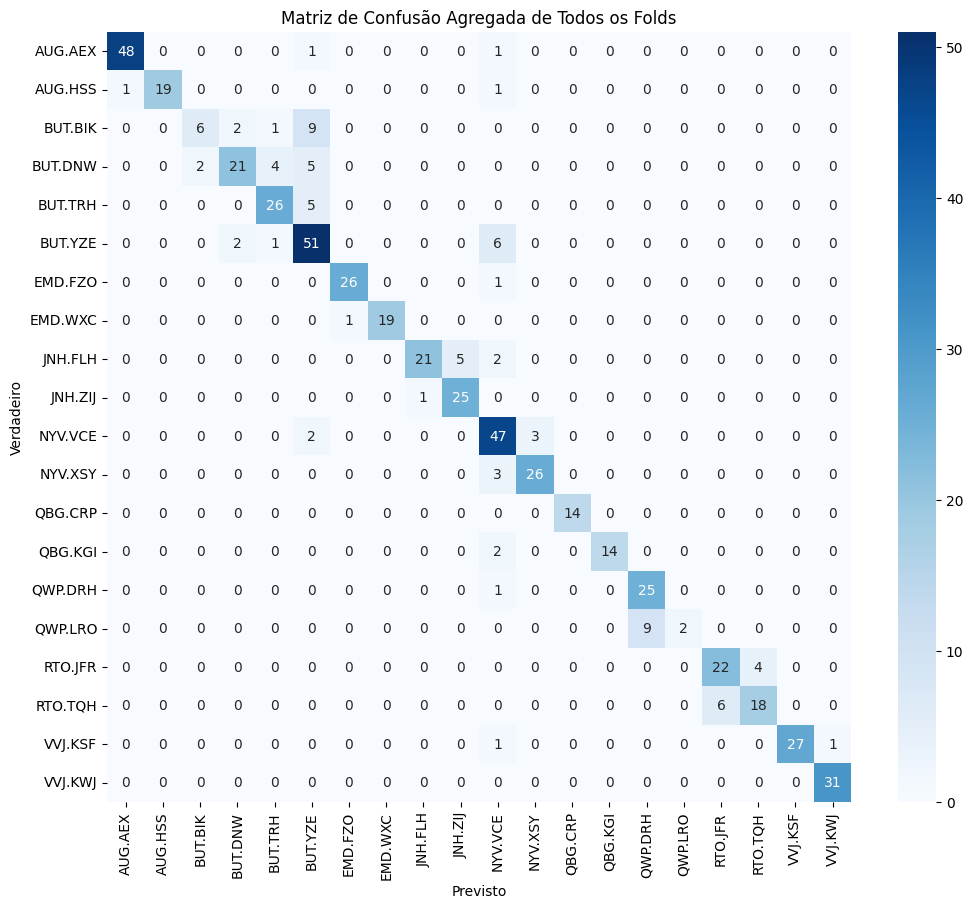

In [62]:
# Calculando a matriz de confusão agregada
summed_matrix = np.sum(conf_matrices, axis=0)

# Plotando a matriz de confusão agregada
plt.figure(figsize=(12, 10))
sns.heatmap(summed_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Matriz de Confusão Agregada de Todos os Folds')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()